# Регресія на головні компоненти

## Yuriy Ryzkin

### Варіант 4

In [1]:
path_to_folder <- paste(dirname(getwd()),'/lab1/data',sep = '')
filenames = list.files(path = path_to_folder,full.names = TRUE)

In [2]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [3]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
number_rows<-nrow(df)

head(df)

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


In [4]:
data_test <- df[(number_rows-19):number_rows,]
data_model1 <- df[0:(number_rows-20),]
data_model2 <- df[(number_rows-69):(number_rows-20),]

In [5]:
library(MASS)

In [11]:
model_1 <- lm.ridge(formula = tomorrow_apd~.-apd,data = data_model1,lambda = seq(0.001,50,.01))

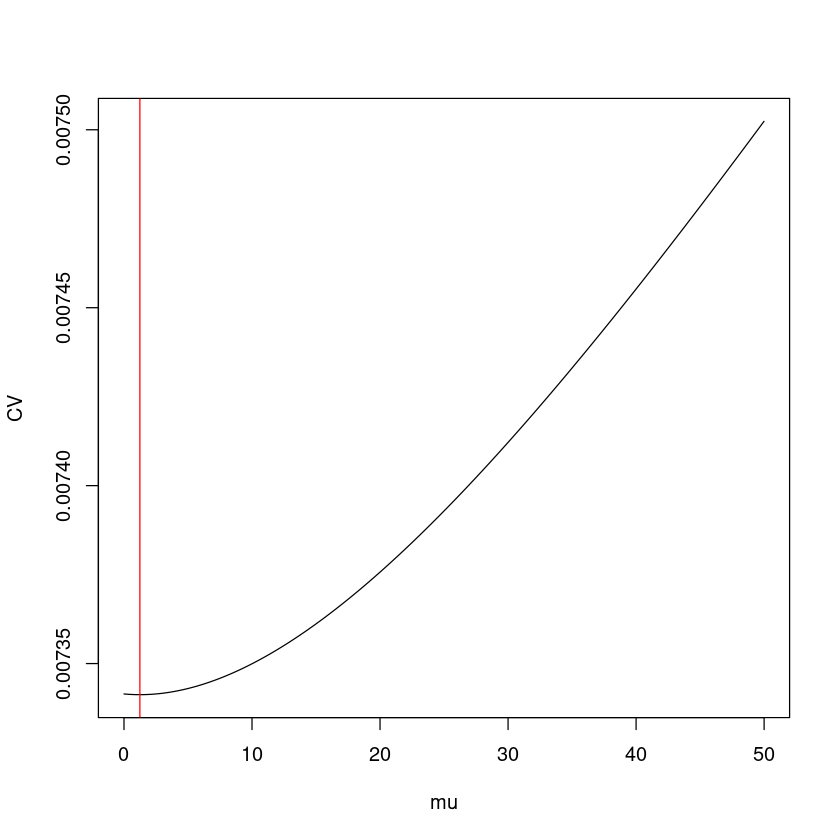

In [16]:
plot(model_1$lambda,model_1$GCV,type="l",xlab="mu",ylab="CV")
i<-which.min(model_1$GCV)
abline(v=model_1$lambda[i],col="red")

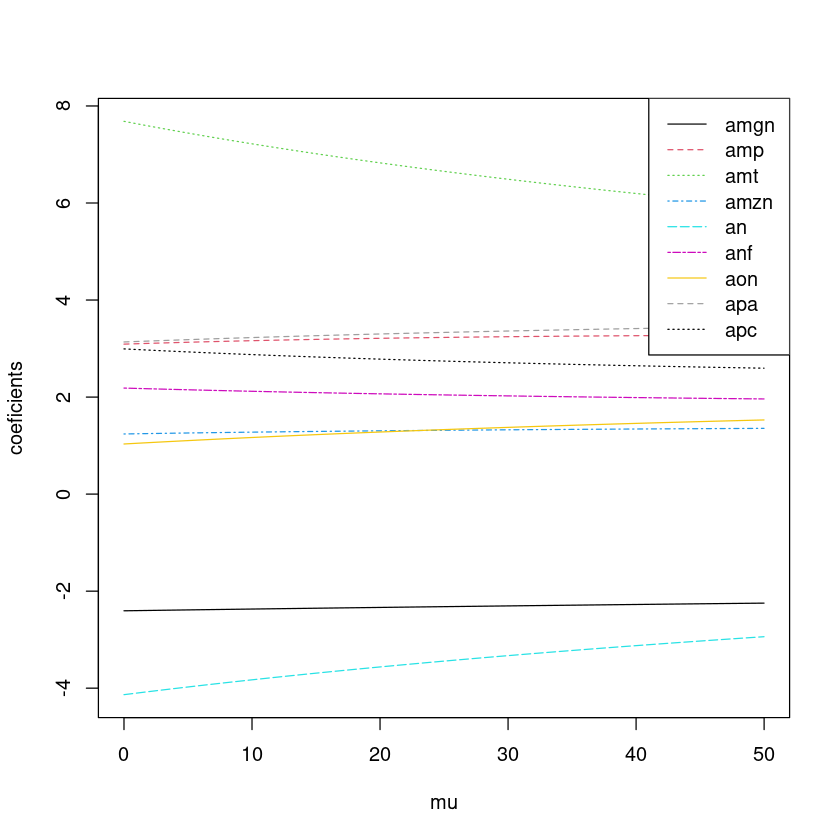

In [24]:
matplot(model_1$lambda,t(model_1$coef),type="l",col=1:9,lty=1:9,xlab="mu",ylab="coeficients")
legend("topright",col=1:9,legend=colnames(data_model1)[1:9],lty=1:9)

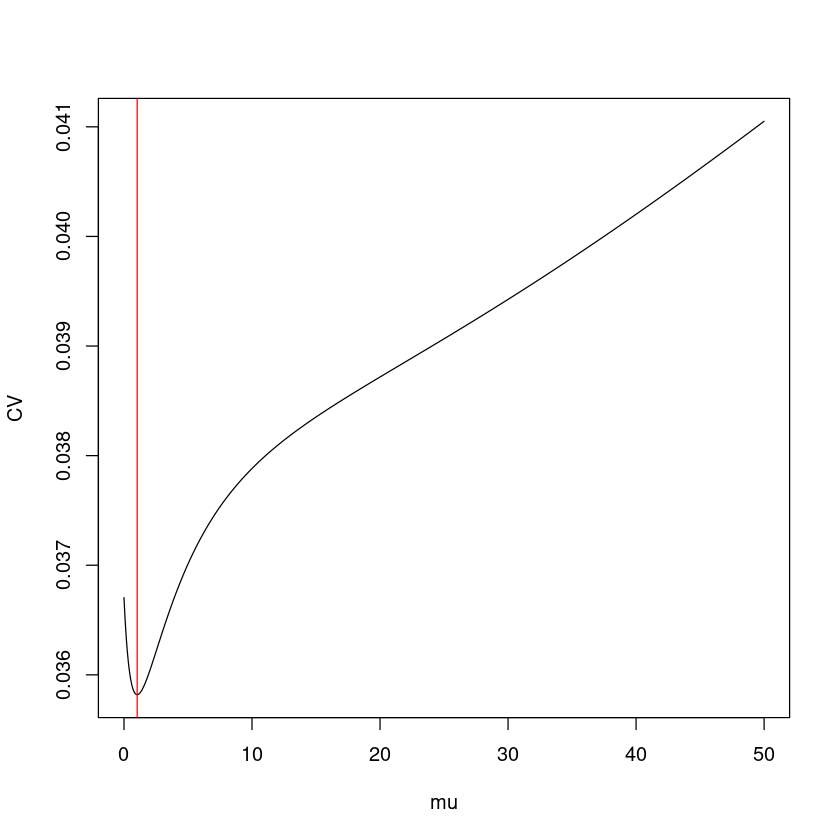

In [20]:
model_2 <- lm.ridge(formula = tomorrow_apd~.-apd,data = data_model2,lambda = seq(0.001,50,.01))
plot(model_2$lambda,model_2$GCV,type="l",xlab="mu",ylab="CV")
i<-which.min(model_2$GCV)
abline(v=model_2$lambda[i],col="red")

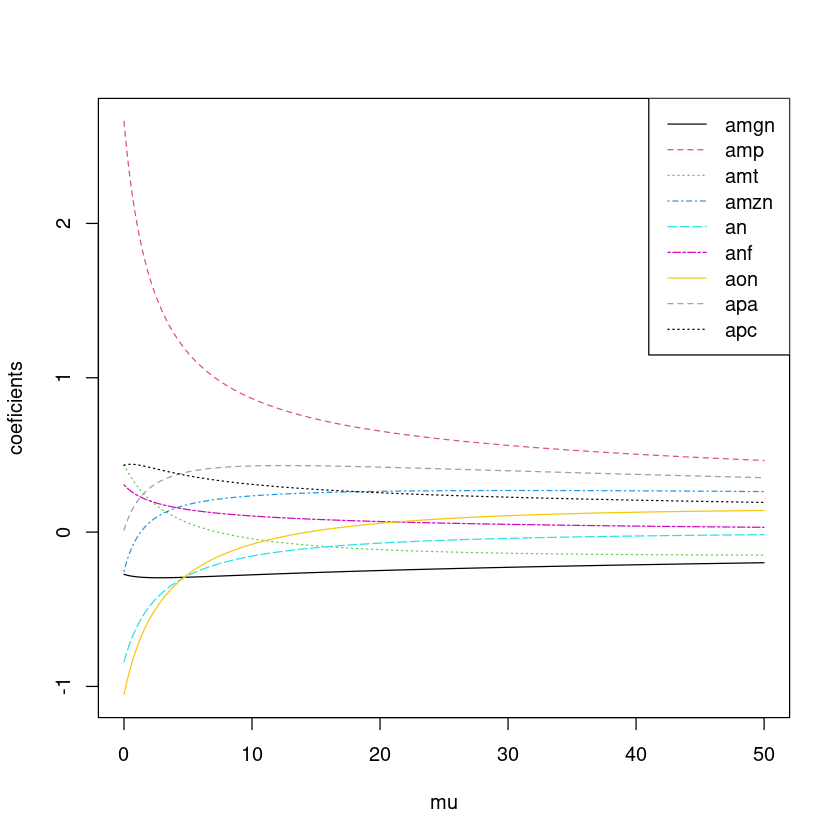

In [23]:
matplot(model_2$lambda,t(model_2$coef),type="l",col=1:8,lty=1:9,xlab="mu",ylab="coeficients")
legend("topright",col=1:9,legend=colnames(data_model2)[1:9],lty=1:9)

In [28]:
model_1$coef

,0.001,0.011,0.021,0.031,0.041,0.051,0.061,0.071,0.081,0.091,⋯,49.901,49.911,49.921,49.931,49.941,49.951,49.961,49.971,49.981,49.991
amgn,-2.404951,-2.404914,-2.404876,-2.404838,-2.404800,-2.404762,-2.404725,-2.404687,-2.404649,-2.404611,⋯,-2.247016,-2.246989,-2.246962,-2.246934,-2.246907,-2.246880,-2.246853,-2.246825,-2.246798,-2.246771
amp,3.091169,3.091254,3.091339,3.091424,3.091508,3.091593,3.091678,3.091763,3.091847,3.091932,⋯,3.277323,3.277331,3.277340,3.277348,3.277357,3.277365,3.277374,3.277382,3.277391,3.277399
amt,7.683234,7.682728,7.682222,7.681716,7.681210,7.680705,7.680199,7.679694,7.679189,7.678683,⋯,5.940008,5.939764,5.939521,5.939277,5.939034,5.938791,5.938548,5.938304,5.938061,5.937818
amzn,1.239606,1.239650,1.239695,1.239739,1.239783,1.239828,1.239872,1.239916,1.239961,1.240005,⋯,1.355311,1.355324,1.355336,1.355348,1.355360,1.355373,1.355385,1.355397,1.355409,1.355422
an,-4.133462,-4.133133,-4.132803,-4.132474,-4.132145,-4.131816,-4.131487,-4.131158,-4.130829,-4.130500,⋯,-2.940485,-2.940310,-2.940136,-2.939961,-2.939787,-2.939612,-2.939438,-2.939264,-2.939089,-2.938915
anf,2.185587,2.185513,2.185439,2.185364,2.185290,2.185216,2.185141,2.185067,2.184993,2.184919,⋯,1.961761,1.961735,1.961710,1.961684,1.961658,1.961632,1.961606,1.961581,1.961555,1.961529
aon,1.033230,1.033376,1.033522,1.033668,1.033814,1.033960,1.034106,1.034252,1.034398,1.034543,⋯,1.528011,1.528077,1.528143,1.528209,1.528275,1.528341,1.528407,1.528473,1.528539,1.528605
apa,3.135847,3.135948,3.136048,3.136149,3.136249,3.136350,3.136450,3.136550,3.136651,3.136751,⋯,3.454317,3.454356,3.454395,3.454434,3.454472,3.454511,3.454550,3.454589,3.454628,3.454666
apc,2.992865,2.992733,2.992601,2.992470,2.992338,2.992207,2.992075,2.991944,2.991813,2.991681,⋯,2.595733,2.595687,2.595642,2.595596,2.595551,2.595505,2.595460,2.595414,2.595369,2.595323
